# Analyse av enzymkinetikkdata

I forrige laboratorieoppgave gjorde dere kinetikkmålinger på enzymet alkalisk fosfatase, som er vist nedenfor.

In [1]:
import nglview as nv

alkalisk_fosfatase = nv.show_pdbid("1ANJ")
alkalisk_fosfatase

NGLWidget()

Du skal nå lære hvordan du kan plotte og analysere enzymkinetikkdata med Python. Først tester vi analyseprogrammet vi lager, med eksempeldata. Dette gjør vi for å sørge for at programmet fungerer som det skal, slik at eventuelle feil som dukker opp, antakelig kan tilskrives dataene du har samlet inn selv.

Dersom du ønsker å friske opp Python-kunnskapene eller ikke har gjort mye Python-programmering før,kan du ta en kikk på nettsidene til IN-KJM1900, spesielt [delen om datahåndtering](https://andreasdh.github.io/programmering-i-kjemi/docs/datahandtering_visualisering/lese_filer.html).

Vi bruker som hovedregel JupyterHub for å programmere. KJM1140 har et eget område inne på JupyterHub hvor eksempelfilene du trenger til denne øvelsen også ligger. Se i filen "Viktig informasjon.ipynb" på JupyterHub for informasjon om hvordan du synkroniserer med KJM1140-mappen. Dersom du ikke har brukt JupyterHub før kan du ta en titt på denne siden for å komme igang: https://www.uio.no/tjenester/it/forskning/beregning/jupyter/ 

Det er også noen spørsmål til oppgave 1 som må besvares i Canvas og leveres iløpet av labdagen (Oppgave 1 Lab 5 - Programmere analyse av kinetikkdata).

## Del 1: Finne initialhastighetene

Før vi kan begynne å analysere Michaelis-Menten- og Lineweaver-Burk-plottene, må vi finne initialhastigheten til reaksjonen som en funksjon av substratkonsentrasjonen fra dataene våre av absorbansøkning over tid.

### Importere data
Vi har lagret eksempelenzymkinetikkdata våre i csv-filer, som du kan finne i KJM1140-mappen på Jupyter eller på Canvas under "Filer lab 5". CSV står for "comma-separated values", altså er dataene separert med komma (eller semikolon). Dette må vi i visse tilfeller gi informasjon om til programmet vårt, så det er viktig å vite.

La oss se på hvordan vi kan lese av fila. Det finnes mange måter å importere filer på i Python. Du kan velge den metoden du er mest komfortabel med. Det enkleste metoden er å bruke enten _read\_csv_ fra pandas-biblioteket eller _loadtxt_ fra numpy-biblioteket. De to metodene kan du se brukt nedenfor

````{tabbed} Lese fil med pandas
```{code-block} Python
import pandas as pd

data = pd.read_csv("Absorbans_tid.csv") # Leser fila

tid = data["tid"]
absorbans = data["absorbans"]
```
```` 

````{tabbed} Lese fil med loadtxt
```{code-block} Python
import numpy as np
data = pd.read_csv("Absorbans_tid.csv")

tid = data["tid"]
absorbans = data["absorbans"]
```
````

Fila du skal lese av, må ligge i samme mappe som programmet som skal analysere og lese fila. Eventuelt kan vi angi filbanen, f.eks. "datafiler/Absorbans_tid.csv". Vi kan også lese direkte fra internett, som vi snart skal se på. Da erstatter du filnavnet med en lenke.

## Lineærtilpasning av dataene

Lineær regresjon betyr å finne et polynom av første grad (en førstegradsfunksjon) som gir minst mulig gjennomsnittlig varians til et sett med datapunkter. Metodene vi skal bruke, benytter minste kvadraters metode for å estimere en slik funksjon. En mye funksjon som er ganske enkel å bruke til dette, er _polyfit_ fra numpy-biblioteket. Du kjenner kanskje til og med denne funksjonen fra før. Denne funksjonen gjør polynomregresjon med en vilkårlig grad av polynomet. 

Det polyfit-funksjonen derimot ikke kan estimere direkte, er andre typer regresjonsmodeller enn lineære, slik som eksponentialfunksjoner, logaritmefunksjoner eller logistiske funksjoner. Vi skal gjøre en logistisk regresjon seinere, og derfor benytter vi heller en annen funksjon som heter _curve\_fit_ fra scipy-biblioteket også når vi skal gjøre lineær regresjon. Denne funksjonen returnerer både koeffisientene i regresjonslinja og et mål på hvor godt modellen passer dataene (såkalt kovarians). Det er koeffisientene _a_ og _b_ i uttrykket $f(x) = ax + b$ som estimeres når vi gjør en linær regresjon.

I _curve\_fit_ må vi definere en funksjonsmodell på formen $f(x, a, b, c, ...)$ som brukes som utgangspunkt for regresjonen. Her skal vi definere en funksjon $f(x, a, b) = ax + b$.

````{admonition} Oppgave
:class: tip

1. Se på programmmet nedenfor og forklar hva det gjør, trinn for trinn.
2. Skriv ut variabelen _koeff_ og forklar hva den beskriver.
3. Lag et plott av absorbans som funksjon av tid. Plott både datapunktene og regresjonslinja. Husk aksetitler og gjerne merkelapper (labels/legend).
````

<iframe src="https://trinket.io/embed/python3/6243f62a04" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

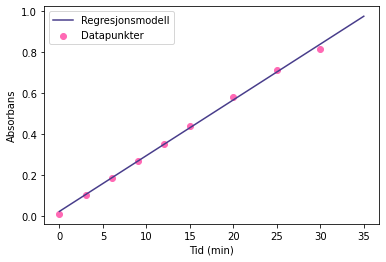

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

data = pd.read_csv("Absorbans_tid.csv")

tid = data["tid"]
absorbans = data["absorbans"]

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

koeff, covar = opt.curve_fit(modell, tid, absorbans)
# Finn a og b her
V0 = koeff[0]
I = koeff[1]

# Beregner funksjonsverdier til den lineære tilpasningen
t = np.linspace(0,35,100) # Nye t-verdier å plotte med
y = V0*t + I               # Regresjonsmodellens y-verdier

# Plott funksjonen her
plt.scatter(tid, absorbans, color = "hotpink", label = "Datapunkter")
plt.plot(t, y, color = "darkslateblue", label = "Regresjonsmodell")
plt.xlabel("Tid (min)")
plt.ylabel("Absorbans")
plt.legend()
plt.show()

Du har nå et program som regner ut initialhastighetene for en bestemt substratkonsentrasjon. Men vi er interessert i å finne initialhastigheten som funksjon av substratkonsentrasjonen. Derfor vil vi gjøre samme prosedyre for alle de målte substratkonsentrasjonene. Vi gjentar dermed prosedyren ovenfor for flere filer med eksperimentelle data, og bruker dermed en løkke.

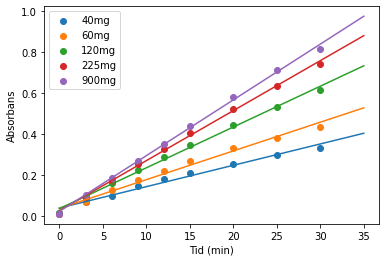

In [22]:
dataliste = ['S40.csv' ,'S60.csv' ,'S120.csv' ,'S225.csv' , 'S900.csv']
S = [40,60,120,225,900] # Substratkonsentrasjoner i mikrogram/L

# Definerer formen på regresjonsmodellen
def modell(x, a, b):
    return a*x + b

t = np.linspace(0,35,100) # Nye x-verdier å plotte med
V = [] # Initialhastigheter

for i in range(len(dataliste)):
    data = pd.read_csv(dataliste[i]) # Leser fila
    koeff, covar = opt.curve_fit(modell, data["tid"], data["absorbans"])
    V0 = koeff[0]
    I = koeff[1]
    y = V0*t + I               # Regresjonsmodellens y-verdier
    plt.scatter(data["tid"], data["absorbans"], label = str(S[i])+"mg")
    plt.plot(t, y)
    plt.xlabel("Tid (min)")
    plt.ylabel("Absorbans")
    V.append(V0) #legger til funnet initialhastighet til liste

plt.savefig("initialhastigheter.png")
plt.legend()
np.savetxt('Reaksjonshastigheter.csv', c_[V,S], delimiter=',', header='Hastighet, Substratkonsentrasjon')
plt.show()

Legg også merke til at på slutten av en runde av løkken har vi lagt til den utregnde V0-verdien
til en liste, _V_. I tillegg har vi puttet savefig(), legend() og show()-funksjonen utenfor løkken slik at vi får alle grafene i ett plott. Funksjonen savefig() vil lagre figuren i mappen du kjører programmet i, men du kan også bare høyreklikke figuren for å lagre den lokalt på PC-en.

````{admonition
:class: tip
1. Skriv ut initialhastighetene du fant. Hvordan fant du disse, og hva forteller de deg?
2. Lagre initialhastighetene sammen med tilhørende substratkonsentrasjon i en .csv-fil. Denne fila skal vi bruke videre til å lage Michaelis-Menten- og Lineweaver-Burk-plott. Du kan lage en .csv-fil ved hjelp av funksjoner fra enten pandas-biblioteket (_to\_csv_) eller numpy (_savetxt_). Siden vi har å gjøre med lister, og ikke en dataframe, er det aller enkleste å bruke _savetxt_ fra numpy-biblioteket:

```{code-block} Python
savetxt('Reaksjonshastigheter.csv', c_[V,S], delimiter=',', header='Hastighet, Substratkonsentrasjon')
```
````

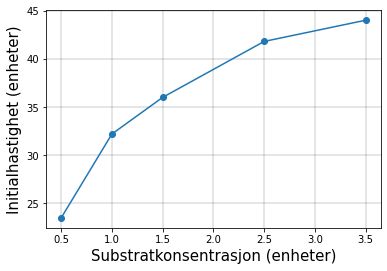

In [9]:
from pylab import *
import scipy.optimize as opt

data2 = loadtxt('Reaksjonshastigheter.csv', delimiter=',', skiprows=1)
V=list(data2[:,0])
S=list(data2[:,1])

figure(0)
plot(S, V, "o-")
ylabel('Initialhastighet (enheter)', fontsize=15)
xlabel("Substratkonsentrasjon (enheter)", fontsize=15)
grid(color='grey', linestyle ='-', linewidth =0.4)
show()